In [250]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouth_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data_df = pd.merge(mouth_drug_data_df, clinical_trial_data_df,
                                 how='outer', on='Mouse ID')


# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [191]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
data_mean = combined_data_df.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
average_tumor_volume_data_df = pd.DataFrame(data_mean)
avg_tumor_df = average_tumor_volume_data_df.reset_index()

# Preview DataFrame
avg_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [192]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_mean = combined_data_df.groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
error_tumor_volume_data_df = pd.DataFrame(error_mean)
standard_error = error_tumor_volume_data_df.reset_index()

# Preview DataFrame
standard_error.drop(columns=['Mouse ID','Metastatic Sites'])


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [193]:
# Minor Data Munging to Re-Format the Data Frames

pivot_avg_tumor_df = avg_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_avg_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [202]:
#YOU NEED TO ADD ERROR!!!!!!

In [271]:
# Generate the Plot (with Error Bars)
drugs = pivot_avg_tumor_df[[ "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
ste = error_mean[drugs]

#Only generate for Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(x=[pivot_avg_tumor_df.index],y=drugs['Capomulin'],ste,linestyle="--",fmt='o',label='Capomulin')
plt.errorbar(x=[pivot_avg_tumor_df.index],y=drugs['Infubinol'],ste, linestyle="--", fmt='o',label='Infubinol')
plt.errorbar(x=[pivot_avg_tumor_df.index],y=drugs['Ketapril'],ste,linestyle="--", fmt='o',label='Ketapril')
plt.errorbar(x=[pivot_avg_tumor_df.index],y=drugs['Placebo'],ste, linestyle="--", fmt='o',label='Placebo')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend()

SyntaxError: positional argument follows keyword argument (<ipython-input-271-415edc6dab26>, line 6)

In [208]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [224]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = combined_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites']

# Convert to DataFrame
avg_met_df = grouped_met_df.mean()
avg_met_df = avg_met_df.reset_index()
# Preview DataFrame

avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [225]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_errors = grouped_met_df.sem()

# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors)

# Preview DataFrame
met_standard_errors_df.reset_index(inplace=True)
met_standard_errors_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [227]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_met_df = avg_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
pivot_avg_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


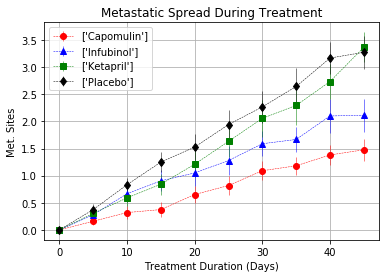

In [267]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_format_list:
    ste = met_standard_errors[drug]
    met_treatment_plt = plt.errorbar(pivot_avg_met_df.index,pivot_avg_met_df[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5,label=[drug])

# Show the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('metastic_spread_during_treatment.png'))

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [244]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = combined_data_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse_df = mouse_grouped_df.nunique()
# Convert to DataFrame
count_mouse_df = pd.DataFrame(count_mouse_df)
count_mouse_df=count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})
count_mouse_df = count_mouse_df.reset_index()

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [245]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
pivot_count_mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


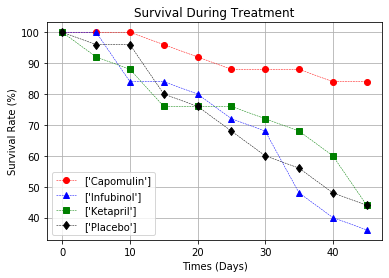

<Figure size 432x288 with 0 Axes>

In [264]:
# Generate the Plot (Accounting for percentages)

for drug,marker,colors in drug_format_list:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_rate = (pivot_count_mouse_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_count_mouse_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5,label=[drug])
# Save the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.show()

# Show the Figure
plt.savefig(os.path.join('survival_during_treatment.png'))

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [254]:
# Calculate the percent changes for each drug
percentage_change = (pivot_avg_tumor_df.iloc[-1]/(pivot_avg_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: 'figures/tumor_change_over_45day_treatment.png'

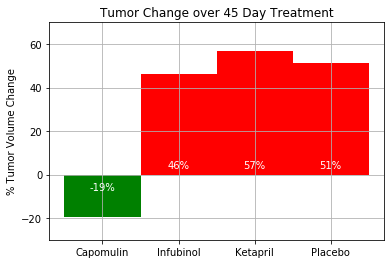

In [259]:
# Store all Relevant Percent Changes into a Tuple

passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='center',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join('figures','tumor_change_over_45day_treatment.png'))

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#My Observations
#1. All the graphs said something slightly different. But it seems like Capomulin had the most impactful result
# compared to the other drugs due to it's size change, survival rate, and treatment length results. 
#2. Tumor Change graph shows us that Capomulin was the only drug out of the four that had a 
#decrease in volume. Metastic Spread During Treatment showed that Placebo was the quickest to spread. 
#3. Also 80% of the mice who had the Capomulin drug survived. Whereas the other drugs performed similarily to the placebo.
